In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [38]:
# Load the dataset
df = pd.read_csv('/content/data/heart.csv')

In [39]:
# Selecting relevant columns
X = df[["Age", "Cholesterol", "FastingBS", "Oldpeak", "RestingBP"]].values
y = df["HeartDisease"].values

# Normalizing the feature columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [40]:
# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i]) ** 2
    return np.sqrt(distance)

In [41]:
# KNN Algorithm
def knn_predict(test_row, X_train, y_train, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(test_row, X_train[i])
        distances.append((X_train[i], y_train[i], dist))
    distances.sort(key=lambda x: x[2])
    neighbors = distances[:k]

    output_values = [row[1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [52]:
# Splitting the dataset into training and testing sets
def train_test_split(X, y, test_size):
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_idx = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    return X_train, X_test, y_train, y_test

# Function to calculate accuracy
def accuracy(y_true, y_pred):
    correct = sum(y_true == y_pred)
    return correct / len(y_true)

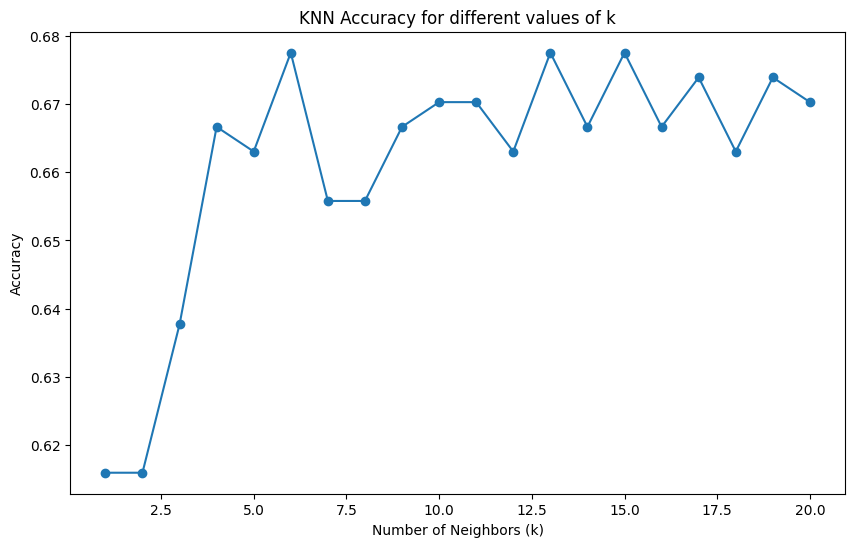

In [53]:
# Function to find the optimal k using the elbow method
def find_optimal_k(X_train, y_train, X_test, y_test, k_range):
    accuracies = []

    for k in range(1, k_range + 1):
        y_pred = [knn_predict(test_row, X_train, y_train, k) for test_row in X_test]
        acc = accuracy(y_test, y_pred)
        accuracies.append(acc)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, k_range + 1), accuracies, marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('KNN Accuracy for different values of k')
    plt.show()



# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, 0.3)

# Determining the optimal k
k_range = 20
optimal_k = find_optimal_k(X_train, y_train, X_test, y_test, k_range)

In [55]:
k = 6
# Predicting labels for each instance in the test set
y_pred = [knn_predict(test_row, X_train, y_train, k) for test_row in X_test]

# Calculating the accuracy
acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")


Accuracy: 0.677536231884058
